**Authors**: Lorenzo Calvetti, Lucia Pezzetti, Andrea Scalenghe, Jacopo Tarantino

# Bayesian inference of a contact network of Potts variables

We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where the exponent represent (minus) the "energy" of the model and the partition function

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

is generally intractable as it requires to sum over $q^M$ states of the variables.

Coming back to our task, our purpose is to infer the coupling matrix $J$. To do so we should decide which estimator will be the object of our inference. Probably the most natural one - and hence our first choice, is the maximum likelihood estimator (MLE). In a regular model, it is generally found has the value of the parameter of interest that solves the first order conditions 

$$\frac{\partial \mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)}{\partial J_{i,j}(a,b)} = 0$$

where

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

is the likelihood distribution of our sampling model.

In general it is useful to compute the log-likelihood divided by $M$ and then its derivative with respect to each parameter $J_{ij}(a,b)$ (note indeed that this trasformation does not affect the monotonicity of the likelihood and hence the coordinates of the maximum).

We obtain:

$$\mathcal{l}\left( J ; \{x^{(m)} \}_{m=1}^{M} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_m J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

and then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Now, solving directly the moment-matching conditions

$$\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)}  = 0$$

is a highly non-trivial numerical task, except for very peculiar forms of the coupling matrix, due to the difficulty in computing averages over the model distribution. Instead we rely on a flexible numerical method, known under the name of Boltzmann machine learning method, that ultimately allow us to iteratively update $J$ using a gradient ascent method.

Note that the gradient ascent method can be performed thanks to the fact that the log-likelihood is a concave function, hence it has only one maximum and the gradient ascent method will numerically compute the MLE of $J$.

Now, in order to design the Boltzmann machine learing scheme, it is crucial to be able to evaluate the gradient of the log-likelihood, whose explicit formula has already been computed above. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling. Then our iterative update of $J$ will be performed as:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

where $\lambda$ is an adequately chosen learning rate.

The intuition underlying this update rule is that, if for example $< \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)}$ is larger than the corresponding value for the data, the value of $J$ should be decreased to match
these two moments.

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$) and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

\begin{aligned}
\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)&=\sum_{k < j}J_{kj}(x_k^n,x_j^n)-\sum_{k < j}J_{kj}(x_k,x_j)+\sum_{k>j}J_{kj}(x_k^n,x_j^n)-\sum_{k>j}J_{kj}(x_k,x_j)+\\ &+ \sum_{k}J_{kk}(x_k^n,x_k^n)-\sum_{k}J_{kk}(x_k,x_k)\\
&=2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)+ \sum_{i}\left(J_{ii}(x_i^n,x_i^n)-J_{ii}(x_i,x_i)\right)
\end{aligned}

So:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence.

Before proceeding with the actual code we make some further remarks.

As the core of the Boltzmann machine learning scheme corresponds to a gradient ascent dynamics for the log-likelihood, convergence towards the maximum is guaranteed, provided an accurate choice of the parameters $\lambda$. However, we are aware of the fact that the Boltzmann machine learning suffers from some drawbacks.

First, as the learning dynamics is formulated in a high-dimensional space, the log-likelihood could be extremely steep along some directions and very flat along others. Thus, a single learning rate $\lambda$ for the couplings could be either too large, leading to overshooting along the steeper directions, or too small, yielding no parameter updates along the flat directions.

This issue could in principle be solved with second-order methods, however estimating the curvature matrix is quite complex and time-demanding in high dimensions and, looking at our results, we believe it would be an overly complicated change.

Second, Boltzmann machine learning may require massive Monte Carlo sampling, because the moments should be computed at each update step. This may arise issues since, in each Monte Carlo simulation, one can not be sure that equilibration has been realised and that the moment are correctly estimated.

Finally, it is important to recall that the choice of the learning rate $\lambda$ is crucial in a gradient-ascent algoritmh. A learning rate that is too small may result in slow convergence, while a learning rate that is too large may cause the algorithm to diverge or oscillate. We choose to fix a learning rate based on empirical experimentation: $\lambda = 0.1$ seemed to us a good trade-off - $\lambda = 0.01$ would have required a too high number of iterations. Another possibility would have been to use an adaptive learning rate method, which would have adjusted the learning rate during training based on the progress of the optimization. 

In [1]:
using Random

Random.seed!(9)

TaskLocalRNG()

In [3]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

metropolis_ising (generic function with 1 method)

In [4]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    if M>size(data, 1)
        print("Too large M")
    else
        sij = Array{Matrix{Float64}}(undef, N, N) 
        for i in eachindex(sij)
            sij[i] = zeros(Float64, q, q)
        end

        for i in 1:N, j in 1:N
            for m in 1:M
                sij[i,j][data[m,i], data[m,j]] += 1
            end
            sij[i,j] ./= M
            #sij[j,i] .= sij[i,j]'
        end

        return sij  # this gives us the sample frequencies
    end
end

compute_stats (generic function with 1 method)

In [5]:
using CSV
using DataFrames

df = DataFrame(CSV.File("data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)

2000×5 Matrix{Int64}:
 2  4  1  1  4
 2  1  1  2  2
 4  1  4  4  3
 1  4  3  1  2
 4  2  2  2  3
 3  3  2  2  3
 4  1  3  4  2
 2  4  3  4  1
 4  1  3  4  3
 2  4  2  4  4
 ⋮           
 2  4  4  1  3
 2  1  1  4  3
 4  2  1  1  4
 2  4  3  1  4
 1  4  4  4  1
 4  1  1  2  3
 3  4  3  2  4
 3  3  1  4  4
 3  4  2  1  4

In [6]:
M = size(xdata, 1)
sij = compute_stats(xdata, M)

5×5 Matrix{Matrix{Float64}}:
 [0.2555 0.0 0.0 0.0; 0.0 0.2545 0.0 0.0; 0.0 0.0 0.2345 0.0; 0.0 0.0 0.0 0.2555]                              …  [0.074 0.0605 0.0575 0.0635; 0.067 0.07 0.0535 0.064; 0.055 0.0565 0.068 0.055; 0.0655 0.057 0.063 0.07]
 [0.03 0.0735 0.056 0.083; 0.072 0.0315 0.072 0.073; 0.0855 0.069 0.032 0.0695; 0.068 0.0805 0.0745 0.03]         [0.067 0.06 0.056 0.0595; 0.064 0.0605 0.0595 0.0645; 0.068 0.063 0.0635 0.0615; 0.0625 0.0605 0.063 0.067]
 [0.025 0.075 0.0615 0.086; 0.0755 0.03 0.074 0.071; 0.077 0.0755 0.0275 0.071; 0.078 0.074 0.0715 0.0275]        [0.023 0.078 0.0655 0.081; 0.078 0.0255 0.0745 0.0725; 0.081 0.0695 0.0295 0.071; 0.0795 0.071 0.0725 0.028]
 [0.069 0.053 0.0575 0.0595; 0.0585 0.073 0.0595 0.0655; 0.0645 0.0685 0.0555 0.05; 0.0635 0.06 0.062 0.0805]     [0.025 0.0685 0.068 0.0775; 0.0855 0.0275 0.07 0.0735; 0.0755 0.067 0.023 0.073; 0.0755 0.081 0.081 0.0285]
 [0.074 0.067 0.055 0.0655; 0.0605 0.07 0.0565 0.057; 0.0575 0.0535 0.068 0.063; 0.06

In [7]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2,
                            show_learning::Bool = true)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to compute
                            # the gradient of the log-likelihood

            for d1 in 1:Twait   # we wait a Twait time before saving two consecutive samples. This takes care of the fact
                                # that samples collected from a Markov chain are not independent
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acent scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if show_learning && mod(t, 10) == 0 
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning (generic function with 1 method)

In [8]:
N = 5
q = 4

J_True = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_True)
    J_True[i] = zeros(Float64, q, q)
end

J_True, sij_model, ε, xall = boltzmann_learning(sij, J_True, λ = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:01
  ε:  0.0505

Learning... 3 	 Time: 0:00:02
  ε:  0.043000000000000003

Learning... 4 	 Time: 0:00:03
  ε:  0.04149999999999998

Learning... 5 	 Time: 0:00:03
  ε:  0.03899999999999998

Learning... 6 	 Time: 0:00:04
  ε:  0.057499999999999996

Learning... 7 	 Time: 0:00:04
  ε:  0.057999999999999996

Learning... 8 	 Time: 0:00:05
  ε:  0.04250000000000001

Learning... 9 	 Time: 0:00:05
  ε:  0.059

Learning... 10 	 Time: 0:00:06
  ε:  0.04349999999999998

Learning... 11 	 Time: 0:00:06
  ε:  0.046999999999999986

Learning... 12 	 Time: 0:00:07
  ε:  0.04200000000000001

Learning... 13 	 Time: 0:00:07
  ε:  0.034

Learning... 14 	 Time: 0:00:08
  ε:  0.036500000000000005

Learning... 15 	 Time: 0:00:08
  ε:  0.044499999999999984

Learning... 16 	 Time: 0:00:08
  ε:  0.03649999999999998

Learning... 17 	 Time: 0:00:09
  ε:  0.05199999999999999

Learning... 18 	 Time: 0:00:09
  ε:  0.039999999999999994

Learning... 19 	 Time: 0:00:10
  ε:  0.05349999999999999

Learning... 20 	 Time: 0:00:10
  ε:  0.038000000000000006

Learning... 21 	 Time: 0:00:11
  ε:  0.04100000000000001

Learning... 22 	 Time: 0:00:11
  ε:  0.05249999999999999

Learning... 23 	 Time: 0:00:12
  ε:  0.04249999999999998

Learning... 24 	 Time: 0:00:12
  ε:  0.035500000000000004

Learning... 25 	 Time: 0:00:13
  ε:  0.05249999999999999

Learning... 26 	 Time: 0:00:13
Learning... 27 	 Time: 0:00:14
  ε:  0.03949999999999998

Learning... 28 	 Time: 0:00:14
  ε:  0.04299999999999998

Learning... 29 	 Time: 0:00:15
  ε:  0.055999999999999994

Learning... 30 	 Time: 0:00:15
  ε:  0.04550000000000001

Learning... 31 	 Time: 0:00:16
  ε:  0.04200000000000001

Learning... 32 	 Time: 0:00:16
  ε:  0.039500000000000035

Learning... 33 	 Time: 0:00:17
  ε:  0.04150000000000001

Learning... 34 	 Time: 0:00:17
  ε:  0.044499999999999984

Learning... 35 	 Time: 0:00:17
  ε:  0.04349999999999998

Learning... 36 	 Time: 0:00:18
  ε:  0.04799999999999999

Learning... 37 	 Time: 0:00:18
  ε:  0.046500000000000014

Learning... 38 	 Time: 0:00:19
  ε:  0.046500000000000014

Learning... 39 	 Time: 0:00:19
  ε:  0.04099999999999998

Learning... 40 	 Time: 0:00:20
  ε:  0.04299999999999998

Learning... 41 	 Time: 0:00:20
  ε:  0.04849999999999999

Learning... 42 	 Time: 0:00:21
  ε:  0.04150000000000001

Learning... 43 	 Time: 0:00:21
  ε:  0.03400000000000003

Learning... 44 	 Time: 0:00:22
  ε:  0.04250000000000001

Learning... 45 	 Time: 0:00:22
  ε:  0.03899999999999998

Learning... 46 	 Time: 0:00:23
  ε:  0.04350000000000001

Learning... 47 	 Time: 0:00:23
  ε:  0.05

Learning... 48 	 Time: 0:00:24
  ε:  0.058499999999999996

Learning... 49 	 Time: 0:00:24
  ε:  0.05150000000000002

Learning... 50 	 Time: 0:00:25
  ε:  0.05199999999999999

Learning... 50 	 Time: 0:00:25

([[0.005150000000000127 0.0 0.0 0.0; 0.0 0.01585000000000007 0.0 0.0; 0.0 0.0 -0.01655000000000079 0.0; 0.0 0.0 0.0 -0.004449999999999919] [-0.3084000000000004 0.08779999999999963 0.18495000000000025 0.040800000000000274; 0.10354999999999981 -0.30245000000000033 0.06550000000000022 0.14924999999999997; 0.02140000000000002 0.12219999999999959 -0.2988000000000003 0.13864999999999997; 0.16770000000000013 0.09989999999999963 0.04895000000000015 -0.32099999999999973] … [0.028900000000000172 -0.039149999999999865 0.04685000000000009 -0.031450000000000033; -0.04950000000000011 0.03589999999999972 0.05705000000000036 -0.027600000000000128; -0.018849999999999898 0.029349999999999828 -0.036049999999999964 0.00899999999999997; 0.018749999999999854 -0.007449999999999897 -0.08039999999999987 0.06465000000000011] [0.013399999999999778 -0.003350000000000136 -0.023449999999999936 0.018549999999999983; 0.03570000000000014 0.02460000000000036 -0.04785000000000006 0.003400000000000043; -0.054699999999999

Up to now we have made inference on the coupling matrix J. 

The next step consists in capturing the topology of the network of pairwise couplings. Since the coupling matrices J are not straightforward to interpret, we rely on a different tool, the Frobenius norm of each coupling matrix $J_{ij}$.

The underlying idea is the following:
to assess the topology, we need to map each $q × q$ coupling matrix $J_{ij}$ onto a scalar quantity measuring the coupling strength between the two variables i and j.

$$F_{ij} = \sqrt{\sum_{a,b}J_{ij}(a,b)^2}$$

Once all the Frobenius norms are computed, the "interacting" sites can be inferred as those site pairs with the strongest couplings.

In [9]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

Frobenius (generic function with 1 method)

In [10]:
Fij = Frobenius(J_True)

5×5 Matrix{Float64}:
 0.023905  0.731363   0.839181   0.164182  0.117663
 0.731363  0.0190582  0.128536   0.811457  0.0992429
 0.839181  0.128536   0.0184701  0.100371  0.870736
 0.164182  0.811457   0.100371   0.033867  0.913384
 0.117663  0.0992429  0.870736   0.913384  0.0220174

In [11]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

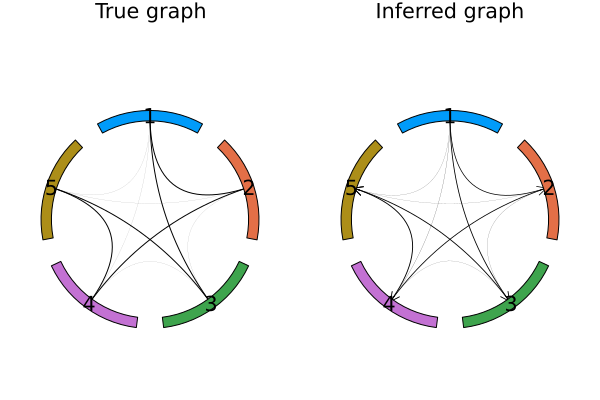

In [12]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


The inferred graph clearly shows that the true couplings are correctly inferred by the Boltzmann machine.

In [13]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

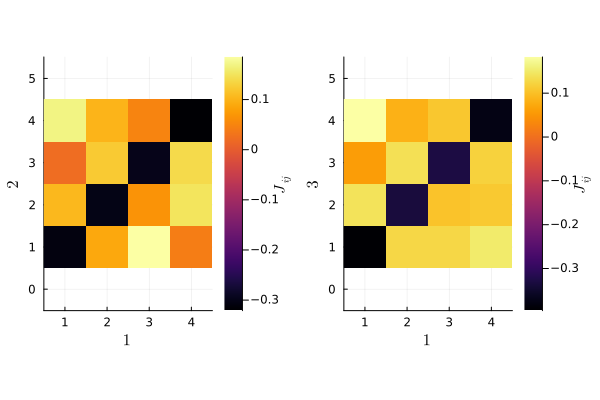

In [14]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J_True[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

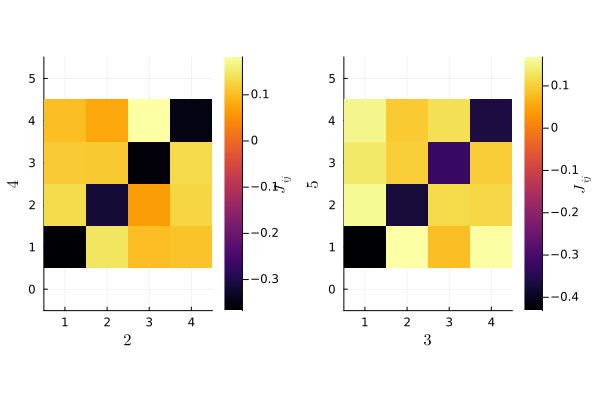

In [15]:
plot(p[3], p[4], aspect_ratio = 1)

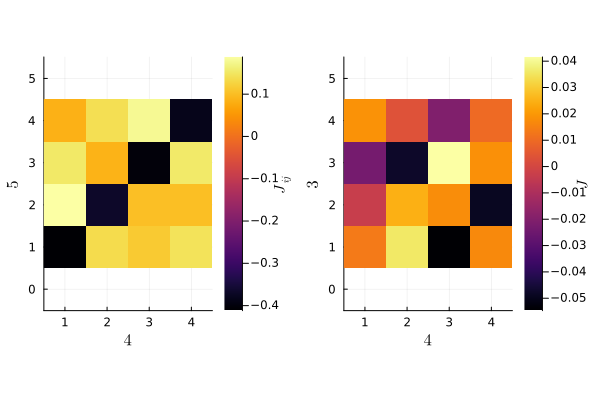

In [16]:
uncorrelated = heatmap(J_True[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)

It is interesting to perform again the estimation of $J$ using a different, Bayesian, approach and then compare the results.

The underlying intuition is the following:

The above "frequentist" Boltzmann machine is aimed at returning a point estimate of J as a result of a maximization problem. In particular, it performs a gradient ascent method in order to maximize the likelihood function and thus it finds numerically the maximum likelihood estimator (MLE) of J, i.e. the value of J for which, under the assumed statistical model, the observed data have the highest joint probability. To better understand its meaning, it is useful to recall that everytime we perform a ML estimation, we are assuming (as in all frequentist statistical inference procedures) a true generating mechanism, that is to say the existence of a true, but unknown, value of the parameter that has generated the data and that we aim to unveil. Thanks to their straightforward interpretation and their "good" properties, MLEs are often used to approximate the true parameter and ML estimation has become a dominant tool to make statistical inference.

What we present next requires the switch from a frequentist to a Bayesian point of view.

Bayesian statisticians consider the parameter as an actual random variable which, therfore, has its own probability distribution. Loosely speaking, in Bayesian statistics a probability expresses a degree of belief: before performing the experiment, the prior distribution of the parameter encodes the a-priori beliefs about the parameter, i.e. what we expect, for any kind of reason, before observing the data. After collecting the data, Bayes theorem is used to incorporate these information in the prior distribution. The result is the so-called posterior distribution of the considered parameter and it embodies our updated beliefs about the parameter, once evidence is observed. The posterior distribution contains our full knowledge about the parameter.

Mathematically, given a prior probability $P(\theta)$ and a likelihood function $P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right)$, the posterior distribution of $\theta$ is, up to a proportionality constant, obtained as

$$P\left(\theta | \,\left\{x^{(m)}\right\}_{i=1}^M\right) \quad \propto \quad P(\theta) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right) $$

The posterior distribution is at the heart of Bayesian inference. Indeed, depending on the situations, meaningful statistics of the parameter can be derived from it and used as estimates of the parameter itself. To be more precise, Bayesian estimation methods are based on the minimization of the posterior risk with respect to a specified loss function. For instance, for a quadratic loss, an absolute error loss or the 0-1 loss function, the Bayes estimator is given, respectively, by the posterior mean, median and mode.

To be more complete, let us mention the fact that dealing with the 0-1 loss function is actually trickier. Everything works fine in the discrete case, whereas in the continuous one it needs to be expressed in terms of the Dirac delta distribution (and thus it would not be properly a function anymore).

In the particular situation we are considering, we aim at modifying the Boltzmann machine so that it would not return the MLE of our parameter $J$, but an estimate that "exploits" its posterior distribution. As we have shortly argued above, there is not a unique choice for the estimator to be used, nevertheless the maximum a posteriori (MAP) estimate appeared to us as the most natural one.

The MAP estimate is, by definition, the value that maximizes the posterior distribution (its mode):
$$J_{MAP} = \argmax_{J} P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)$$

Its interpretation is clear: it corresponds to the "point" in the parameter space with the "highest probability of occurence", given both the observed data and prior information.

It is also interesting (and easy to observe) that if the prior distribution over the parameter is chosen to be uniform, then the MAP estimate actually coincides with the MLE. Generally a uniform prior distribution is interpreted as an uninformative prior distribution, meaning that it is used when no prior information is available or to prevent our prior beliefs from affecting the results. As a consequence the posterior distribution will be totally specified by the likelihood function and the MLE will be retrieved. This provides further support to our estimation choice: the previous estimation procedure intrinsically emerges as a special case (the one corresponding to a uniform prior distribution) of the method we are going to present.

As a final remark, we can say that the MAP estimate can be considered a "Bayesian generalization of the MLE", since it corresponds to the mode of an augmented optimization objective which incorporates the prior distribution (that quantifies the a-priori additional information available).

Given everything we have said, let us design the new Boltzmann machine learning scheme. Exactly as before, we use an iterative update of $J$ based on a gradient ascent method, hence we need to compute the gradient of the objective function we want to maximizes:

$$\begin{aligned}
P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right) = \quad &\propto \quad P(J) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,J \right)\\ & = e^{-\lambda \sum_{a,b,i,j}\lvert J_{ij}(a,b) \rvert} \, \prod_m\frac{1}{Z}e^{\sum_{i,j}\sum_{a,b}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}
\end{aligned}$$

(note that it is concave so it has only one maximum and the gradient ascent method can be performed)

It is convenient to take its logarithm and divide everything by M:
$$ (\star) \quad \frac{1}{M} log\left(P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)\right) = - \frac{\lambda}{M}\sum_{a,b,i,j} \lvert J_{ij}(a,b) \rvert + {\frac{1}{M}} \sum_{i,j}\sum_{a,b}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

We can now derive the gradient:

\begin{aligned}
\frac{\partial (\star) }{\partial J_{i,j}(a,b)} & = -\frac{\lambda}{M} sign\left( J_{i,j}(a,b) \right) + {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)} \delta_{(x_j^{(m)},b)}} \\
& = -\frac{\lambda}{M} sign\left( J_{i,j}(a,b) \right) +  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}
\end{aligned}

The Boltzmann machine learning scheme can therefore being updated as follows:
$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) \, {-\frac{\lambda*\lambda_{J}}{M}} sign\left( J_{i,j}(a,b) \right) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

As a matter of notation, we will denote the parameter $\lambda$ of the prior distribution as $\lambda_{prior}$.

In [17]:
using ProgressMeter
using Distributions

function boltzmann_learning_MAP(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, λ_prior::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2,
                            show_learning::Bool = true)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising.
        end

        for d in 1:dmax    
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)
        Δsij = sij  .- sij_model 
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        for i in 1:N, j in 1:N
            J[i,j] = J[i,j] - (λ_prior*λ)/dmax .* sign.(J[i,j])     # component of the gradient related to the prior distribution
        end
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if show_learning && mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning_MAP (generic function with 1 method)

In [18]:
N = 5
q = 4

J_MAP = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_MAP)
    J_MAP[i] = zeros(Float64, q, q)
end

J_MAP, sij_model, ε, xall = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:01
  ε:  0.045499999999999985

Learning... 3 	 Time: 0:00:02
  ε:  0.0505

Learning... 4 	 Time: 0:00:02
  ε:  0.046500000000000014

Learning... 5 	 Time: 0:00:03
  ε:  0.0465

Learning... 6 	 Time: 0:00:03
  ε:  0.04500000000000001

Learning... 7 	 Time: 0:00:04
  ε:  0.05149999999999999

Learning... 8 	 Time: 0:00:04
  ε:  0.04249999999999998

Learning... 9 	 Time: 0:00:05
  ε:  0.0695

Learning... 10 	 Time: 0:00:06
  ε:  0.0695

Learning... 11 	 Time: 0:00:06
  ε:  0.045999999999999985

Learning... 12 	 Time: 0:00:07
  ε:  0.044999999999999984

Learning... 13 	 Time: 0:00:07
  ε:  0.0325

Learning... 14 	 Time: 0:00:08
  ε:  0.043999999999999984

Learning... 15 	 Time: 0:00:08
  ε:  0.034999999999999976

Learning... 16 	 Time: 0:00:09
  ε:  0.034499999999999975

Learning... 17 	 Time: 0:00:10
  ε:  0.049000000000000016

Learning... 18 	 Time: 0:00:10
  ε:  0.056499999999999995

Learning... 19 	 Time: 0:00:11
  ε:  0.056999999999999995

Learning... 20 	 Time: 0:00:11
  ε:  0.04899999999999999

Learning... 21 	 Time: 0:00:12
  ε:  0.025499999999999967

Learning... 22 	 Time: 0:00:12
  ε:  0.04299999999999998

Learning... 23 	 Time: 0:00:13


Learning... 24 	 Time: 0:00:13
  ε:  0.04350000000000001

Learning... 25 	 Time: 0:00:14
  ε:  0.056999999999999995

Learning... 26 	 Time: 0:00:14
  ε:  0.035499999999999976

Learning... 27 	 Time: 0:00:15
  ε:  0.03749999999999998

Learning... 28 	 Time: 0:00:16
  ε:  0.03999999999999998

Learning... 29 	 Time: 0:00:16
  ε:  0.03949999999999998

Learning... 30 	 Time: 0:00:17
  ε:  0.026499999999999968

Learning... 31 	 Time: 0:00:17
  ε:  0.0325

Learning... 32 	 Time: 0:00:18
  ε:  0.05249999999999999

Learning... 33 	 Time: 0:00:18
  ε:  0.046499999999999986

Learning... 34 	 Time: 0:00:19
  ε:  0.04450000000000001

Learning... 35 	 Time: 0:00:19
  ε:  0.030999999999999972

Learning... 36 	 Time: 0:00:20
  ε:  0.04450000000000001

Learning... 37 	 Time: 0:00:21
  ε:  0.04450000000000001

Learning... 38 	 Time: 0:00:21
  ε:  0.055499999999999994

Learning... 39 	 Time: 0:00:22
  ε:  0.044499999999999984

Learning... 40 	 Time: 0:00:22
  ε:  0.03900000000000001

Learning... 41 	 Time: 0:00:23
  ε:  0.032999999999999974

Learning... 42 	 Time: 0:00:23
  ε:  0.034

Learning... 43 	 Time: 0:00:24
  ε:  0.028499999999999998

Learning... 44 	 Time: 0:00:25
  ε:  0.0655

Learning... 45 	 Time: 0:00:25
  ε:  0.038500000000000006

Learning... 46 	 Time: 0:00:26
  ε:  0.05099999999999999

Learning... 47 	 Time: 0:00:26
  ε:  0.037000000000000005

Learning... 48 	 Time: 0:00:27
  ε:  0.05149999999999999

Learning... 49 	 Time: 0:00:27
  ε:  0.0605

Learning... 50 	 Time: 0:00:28
  ε:  0.048500000000000015

Learning... 50 	 Time: 0:00:28


([[-0.006229999999999906 0.0 0.0 0.0; 0.0 0.005030000000000183 0.0 0.0; 0.0 0.0 -0.0037300000000011126 0.0; 0.0 0.0 0.0 0.0007300000000000945] [-0.31877999999999435 0.08857999999999787 0.17373000000000288 0.03280000000000068; 0.09516999999999735 -0.3114299999999945 0.06688000000000013 0.14151000000000183; 0.010820000000000163 0.11357999999999698 -0.2845799999999956 0.13283000000000034; 0.17548000000000252 0.08671999999999752 0.04053000000000061 -0.31737999999999394] … [0.024960000000000572 -0.04801000000000021 0.04723000000000044 -0.0278700000000004; -0.052480000000000505 0.043880000000000155 0.039350000000000725 -0.01858000000000052; -0.008469999999999908 0.02369 -0.038030000000000355 0.01318000000000012; 0.010729999999999872 -0.009749999999999913 -0.0701799999999975 0.07222999999999741] [0.008600000000000184 -0.001450000000000258 -0.027830000000000278 0.01377000000000023; 0.005360000000000374 0.03706000000000071 -0.04603000000000052 -0.0004999999999999365; -0.04548000000000038 0.0264

As before, we detect the "interacting" variables by means of the Frobenius norm of each coupling matrix.

In [19]:
Fij_MAP = Frobenius(J_MAP)

5×5 Matrix{Float64}:
 0.00886339  0.723604   0.835138   0.158474   0.120795
 0.723604    0.0186679  0.119344   0.805495   0.0969079
 0.835138    0.119344   0.0115726  0.100587   0.868286
 0.158474    0.805495   0.100587   0.0326683  0.886778
 0.120795    0.0969079  0.868286   0.886778   0.0136285

It is easy to verify that the just computed coupling pattern fit the previous one. Indeed, even if the entities of the norms may be differ a bit, the detected contacting (or interacting) site pairs correspond exactly.

Note that this is also important to target the coherence of our results: at least nothing seems to suggest that our procedures are wrong.

Before continuing the comparison of the two strategies - the frequentist and the Bayesian one - we target rapidly the choice of the parameter $\lambda_{prior}$ of the prior distribution. Loosely speaking, as the sample size increases, the likelihood becomes more and more relevant in determining the posterior distribution, however an inappropriate prior distribution may dramatically slow down the convergence or even lead to inconsistent results. Therefore, in real-life applications, it is preferable to determine it by means of cross-validation.

To adress our particular case it may be useful to try to understand the meaning of the prior distribution.

We can eaily recognize, in its exponential, the L1-norm of the parameter coupling matrix $J$. Now, since our aim is to maximize the posterior distribution, the chosen $L_1$ prior imposes a sparse solution by adding a "penalty" that increases quickly near the origin, with a linear slope. In other words, because the prior is an exponentially
decaying function, in the course of inference it favors matrices $J$ with small $L_1-norms$ and penalises $J$'s with large $L_1-norms$, . More generally, this prior may be seen as a regulariser: it penalises large parameter values that may arise through maximization of the log-likelihood.

Actually, something more interesting can be said: if we consider the whole class of $L_p-norm$ priors

$$p(J) = e^{-\lambda \, \lvert\lvert J \rvert\rvert_p} $$

it can be proven that the $L_1$ prior is the only one that favours sparsity while preserving the concavity of the log-likelihood into the log-posterior.

In our case, we have been explicitely asked to choose a small $\lambda_{prior}$ in the prior distribution. Heuristically, we may understand this request by noticing that if $\lambda_{prior}$ is large, then the prior distribution returns values very close to zero (for every J whose norm 1 is different from zero). This may result in a posterior distribution that is "too flat" and depends only poorly on the likelihood. In other words we can say that the model is overconstrained by the prior, and has not enough power to account for the true distribution of the data.

Conversely, choosing a $\lambda_{prior}$ that is too small makes almost irrelevant the presence of the prior distribution (indeed in the limit $\lambda_{prior} \to 0$ the prior distribution becomes closer and closer to a uniform one). As a consequence we may say that, for low $\lambda_{prior}$ values, the inferred model overfits the details of the data set and this is actually one of the things aimed to avoid using a Bayesian framework.

For these reasons we decided to choose a "good compromise" between these extreme behaviors: $\lambda_{prior} = 0.1$ appears to us as a good choice.

Below we tried to re-run the *boltzmann_learning_MAP* function for different values of $\lambda_{prior}$.

In [20]:
λ_prior = 10.0 #0.1, 1.0, 0.01
q = 4
fill!(J_MAP, zeros(Float64, q,q))
J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = λ_prior, Tmax = 500, εmax = 1e-2, show_learning = false)

Fij_MAP = Frobenius(J_MAP)

5×5 Matrix{Float64}:
 0.00243516  0.261276    0.35434     0.00563338  0.00474605
 0.261276    0.00328253  0.00481508  0.322906    0.00339706
 0.35434     0.00481508  0.0021225   0.00547449  0.368414
 0.00563338  0.322906    0.00547449  0.0062141   0.382697
 0.00474605  0.00339706  0.368414    0.382697    0.00494419

As expected for large values of $\lambda_{prior}$, the Boltzmann machine learning scheme does not seem to work properly. Indeed, by looking at the corresponding Frobenius norms, we can observe that the entries of the inferred coupling matrix (and so their Frobenius norms) are eccesively drawn toward zero. This suits perfectly our previus interpretation: for large values of $\lambda_{prior}$ the prior is over-weighted and, consequently, the prior is over-constrained. This lead to a very sparse coupling matrix. Nevertheless we are still able to detect the strongest couplings.

For what concerns small - but still sufficiently different from zero - values of $\lambda_{prior}$ (such as $\lambda_{prior} = 0.5, \, 0.1, \, 0.01$) we found consistency with the previous method.

This is important since it gives us a further check of the previous results.

We now proceed with our comparison: our current aim is to tackle the efficiency of the two approaches.

More precisely, since we are mainly interested in detecting the "interacting variables" - i.e. the pairs of variables that score high in the Frobenius norm matrix - we appreciate the efficiency of the methods by looking at "how strong the couplings of the interacting variables are". In addition, it is also interesting to check wheter the "gap" between the Frobenius norms of the most coupled and less coupled variables remains sufficiently large.

To do so we re-run the Boltzmann machine algorithms letting the number of iterations performed by the Boltzmann learning schemas vary:

In [21]:
Tmax_range = [100, 500, 1000, 2500, 5000]
Fij_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))
Fij_MAP_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))

J = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J)
    J[i] = zeros(Float64, q, q)
end

for (i, Tmax) in enumerate(Tmax_range)
    fill!(J, zeros(Float64, q,q))
    fill!(J_MAP, zeros(Float64, q,q))

    J, _ = boltzmann_learning(sij, J, λ = 0.1, Tmax = Tmax, εmax = 1e-2, show_learning = false)
    J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = Tmax, εmax = 1e-2, show_learning = false)

    Fij_Tmax[i] = Frobenius(J)
    Fij_MAP_Tmax[i] = Frobenius(J_MAP)   
end

In [22]:
print("Tmax = ", Tmax_range[1])

display(Fij_Tmax[1])
display(Fij_MAP_Tmax[1])

5×5 Matrix{Float64}:
 0.0180424  0.446833   0.49115     0.152824   0.111117
 0.446833   0.0270658  0.0992425   0.486385   0.0597116
 0.49115    0.0992425  0.00732837  0.0749053  0.511297
 0.152824   0.486385   0.0749053   0.0362535  0.512174
 0.111117   0.0597116  0.511297    0.512174   0.0190112

5×5 Matrix{Float64}:
 0.0324088  0.461555   0.496671    0.141119   0.108583
 0.461555   0.01475    0.0994814   0.47631    0.0426728
 0.496671   0.0994814  0.00837588  0.0752492  0.499068
 0.141119   0.47631    0.0752492   0.036627   0.517418
 0.108583   0.0426728  0.499068    0.517418   0.0193912

Tmax = 100

In [23]:
print("Tmax = ", Tmax_range[2])

display(Fij_Tmax[2])
display(Fij_MAP_Tmax[2])

5×5 Matrix{Float64}:
 0.0220819  0.737262   0.835461  0.156918  0.11983
 0.737262   0.0154005  0.118749  0.810762  0.104342
 0.835461   0.118749   0.01708   0.11176   0.897762
 0.156918   0.810762   0.11176   0.042221  0.910015
 0.11983    0.104342   0.897762  0.910015  0.0189611

5×5 Matrix{Float64}:
 0.0100063  0.733183   0.824464   0.152971   0.108764
 0.733183   0.0240593  0.128511   0.794201   0.100709
 0.824464   0.128511   0.0154615  0.104699   0.879987
 0.152971   0.794201   0.104699   0.0421976  0.897868
 0.108764   0.100709   0.879987   0.897868   0.0147166

Tmax = 500

In [24]:
print("Tmax = ", Tmax_range[3])

display(Fij_Tmax[3])
display(Fij_MAP_Tmax[3])

5×5 Matrix{Float64}:
 0.0224484  0.748769   0.869638   0.159536   0.105357
 0.748769   0.0256518  0.130869   0.832466   0.119027
 0.869638   0.130869   0.0282043  0.11978    0.931454
 0.159536   0.832466   0.11978    0.0409431  0.953308
 0.105357   0.119027   0.931454   0.953308   0.0293494

5×5 Matrix{Float64}:
 0.0107813  0.739792   0.864874    0.152706    0.101622
 0.739792   0.0124076  0.126977    0.822195    0.10844
 0.864874   0.126977   0.00591346  0.109591    0.91485
 0.152706   0.822195   0.109591    0.00842576  0.938968
 0.101622   0.10844    0.91485     0.938968    0.00647094

Tmax = 1000

In [25]:
print("Tmax = ", Tmax_range[4])

display(Fij_Tmax[4])
display(Fij_MAP_Tmax[4])

5×5 Matrix{Float64}:
 0.016849  0.762526   0.877269   0.154829   0.114223
 0.762526  0.0169037  0.13611    0.829266   0.114426
 0.877269  0.13611    0.0237639  0.11392    0.920074
 0.154829  0.829266   0.11392    0.0438223  0.94605
 0.114223  0.114426   0.920074   0.94605    0.0179395

5×5 Matrix{Float64}:
 0.0111493  0.762801    0.860659   0.155959    0.106944
 0.762801   0.00657193  0.137625   0.831519    0.11881
 0.860659   0.137625    0.0116716  0.124975    0.910514
 0.155959   0.831519    0.124975   0.00824848  0.938798
 0.106944   0.11881     0.910514   0.938798    0.0120665

Tmax = 2500

In [26]:
print("Tmax = ", Tmax_range[5])

display(Fij_Tmax[5])
display(Fij_MAP_Tmax[5])

5×5 Matrix{Float64}:
 0.0226559  0.746791   0.873813   0.15326   0.116869
 0.746791   0.0231395  0.13513    0.832734  0.114342
 0.873813   0.13513    0.0250612  0.104072  0.928905
 0.15326    0.832734   0.104072   0.041937  0.938439
 0.116869   0.114342   0.928905   0.938439  0.020324

5×5 Matrix{Float64}:
 0.00828398  0.762052   0.888417    0.166384   0.114675
 0.762052    0.0102531  0.129449    0.844733   0.113139
 0.888417    0.129449   0.00539327  0.104853   0.919336
 0.166384    0.844733   0.104853    0.0114002  0.958897
 0.114675    0.113139   0.919336    0.958897   0.0170169

Tmax = 5000

First of all we observe that looking at the different matrices we can find consistency between the two methods. Indeed in each of the above matrices we can easily distinguish the "true-interacting" variables.

Moreover we can argue that, if the number of iterations of the Boltzmann learning remains relatively small, then it seems that the MLE of $J$ corresponds to a "more coupled" configuration than the MAP estimator. Once the number of iterations grows, however, the difference between the two matrices tends to disaappear and, therefore, we can say that the second method starts to learn at a faster rate. 

These results may be explained by recalling the interpretation of the prior distribution as a regulariser. Since it tends to penalize large parameter values - that may arise through maximisation of the log-likelihood - and favors sparsification of $J$, it seems reasonable to have a MAP estimator that has entries closer to zero than those of the MLE.

On the other hand, as the number of iterations gets larger, it may happen that the presence of the regulariser actually makes the method more stable and hence better in targeting the strongly coupled variables.  

In any case, we emphasize the fact the results of the two approaches are coherent: we always observe a meaningfully large gap among the strong and weak couplings (and the detected strongest-coupled variables are always the same).

Moreover it seems also clear to us that using the MAP estimate is not a significant improvedent to the method. For this reason in all the following points we always relies on the previous one.


In order to repeat the inference changing the number of configurations $M$ we recall the function that defines the Boltzmann machine and modify it restraining the number of observations from the file "data.dat". This procedure is actually straighforward given the definition that we gave to the function "compute_stats", in fact we just need to choose the number "M" as we want and then run the Boltzmann machine.

In [27]:
M = [10,50,100,500,1000]
sij_new = Any[]

for i in 1:size(M,1)
    s = compute_stats(xdata, M[i])
    push!(sij_new, s)
end

J_new = Any[]
sij_model_new = Any[]
ε_new = Any[]
xall_new = Any[]
Fij_new = Any[]

for j in 1:size(sij_new,1)
    J0 = Array{Matrix{Float64}}(undef, N, N)
    for i in eachindex(J0)
        J0[i] = zeros(Float64, q, q)
    end
    a, b, c, d = boltzmann_learning(sij_new[j], J0, λ = 0.1, Tmax = 500, εmax = 1e-2, show_learning = false)
    e = Frobenius(a)
    push!(J_new, a)
    push!(sij_model_new, b)
    push!(ε_new, c)
    push!(xall_new, d)
    push!(Fij_new, e)
end

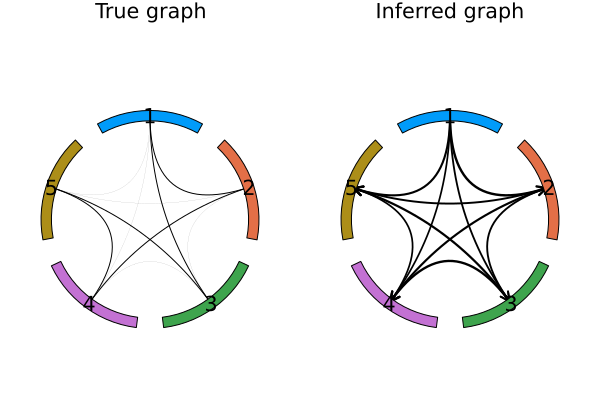

In [28]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij_new[1], edgewidth = abs.(Fij_new[1]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)

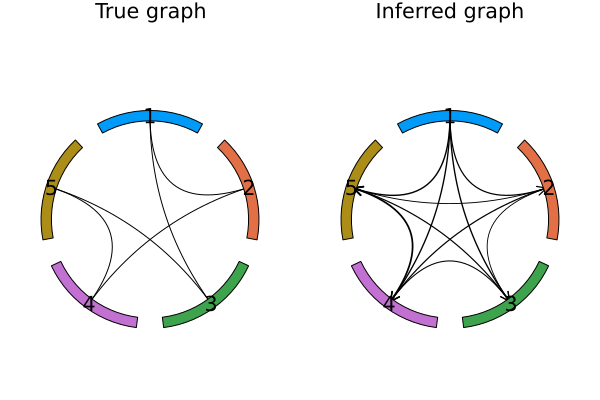

In [54]:
p3 = graphplot(Fij_new[2], edgewidth = abs.(Fij_new[2]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p3, aspect_ratio = 1)

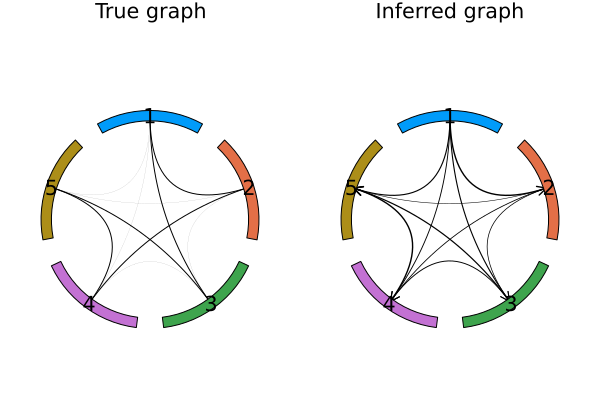

In [29]:
p4 = graphplot(Fij_new[3], edgewidth = abs.(Fij_new[3]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p4, aspect_ratio = 1)

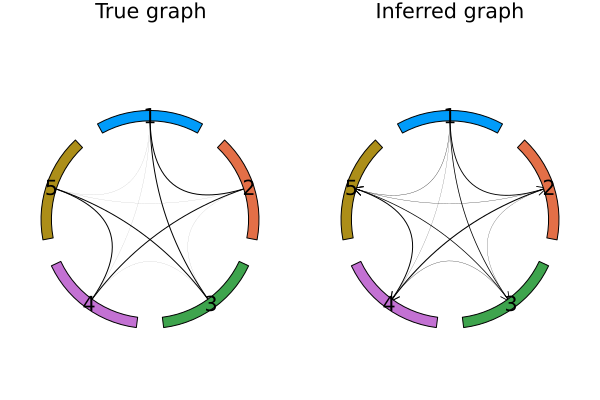

In [30]:
p5 = graphplot(Fij_new[4], edgewidth = abs.(Fij_new[4]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p5, aspect_ratio = 1)

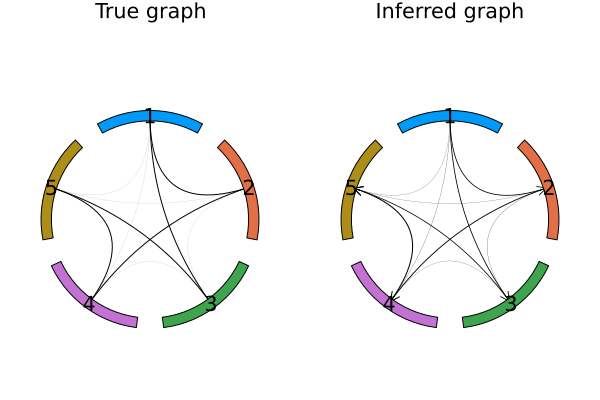

In [31]:
p6 = graphplot(Fij_new[5], edgewidth = abs.(Fij_new[5]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p6, aspect_ratio = 1)

By this comparison it becomes clear how much the number of observations is crucial in the inference process. Indeed we can see that while M is less than 500 observation it is almost impossible to detect the actual couplings, while if M is sufficiently large the Boltzamann machine allows us to spot them. It is also worth to note that for M greater than 1000 the inference process does not improve if M increases.  

One of the main problems of MCMC is that the samples are not independent. Therefore usually the collection of samples is done waiting a time interval $\Delta t$ that brings independece between samples. In order to quantify this correlation we estimate the autocorrelation function associated to the Markov chain that fetures the Bolzmann Machine. We recall that the autocorrelation function has the form:

\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu_t)(x^{(s)}-\mu_s)]}{\sqrt {\sigma_t^2\sigma_s^2}}
\end{align}

Because of the stationarity of the Markov chain we get:

\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu)(x^{(t+r)}-\mu)]}{\sigma^2}
\end{align} 

As seen in the lectures an unbiased Monte Carlo estimator of $\gamma$ (in the situation of monodimensional samples $\left\{ x_m \right\}_{m=1}^M$) is given by:

\begin{align}
\hat{\gamma}_n(r) = \frac{\frac{1}{n-r}\sum_{k=1}^{n-r}(x^{(k)}-\hat{\mu}_n)(x^{(k+r)}-\hat{\mu}_n)}{\frac{1}{n}\sum_{k=1}^{n}(x^{(k)}-\hat{\mu}_n)^2}
\end{align}

where $\hat{\mu}_n$ is the sample mean of our data.

Here we have a bit more complicated situation, indeed each $x_m, \quad m = 1, \dots, M$ is a N-dimensional vector, hence we need a multidimensional generalization of the autocorrelation function. To do so we rely on the fact that an unbiased estimator for the covariance matrix between two random vector $X$ and $Y$ is:

$$ \hat{S}^2 = \frac{1}{n-1}\sum_{k=1}^n (x^{(k)} - \hat{\mu}^{(x)}_n)(y^{(k)} - \hat{\mu}^{(y)}_n)^T $$

where $\hat{\mu}^{(x)}_n = \frac{1}{n}\sum_{k=1}^n x^{(k)}$ and $\hat{\\mu}^{(y)}_n = \frac{1}{n}\sum_{k=1}^n y^{(k)}$ are the vector of sample means of $X$ and $Y$, respectively.

Hence our estimator for the autocorrelation function will be

$$\hat{\gamma}_n(r) = \left[\frac{1}{n-r}\sum_{k=1}^{n-r}(\hat{x}^{(k)}-\hat{\mu}_n)(x^{(k+r)}-\hat{\mu}_n)^T\right]\left[\frac{1}{n}\sum_{k=1}^{n}(x^{(k)}-\hat{\mu}_n)(x^{(k)}-\hat{\mu}_n)^T\right]^{-1}$$

In [32]:
using LinearAlgebra
function autocorrelation(x::Matrix{Float64}, R::Int64, N::Int64, M::Int64)
    μ = zeros(N)   
    for i in 1:N
        μ[i] = sum(x[:, i]) / M
    end

    gamma_mt = zeros(R, N, N)
    
    for r in 1:R
        for k in 1:(M-r+1)
            gamma_mt[r,:,:] += (x[k, :] - μ) * transpose(x[k+r-1, :] - μ) ./ (M - r + 1)
        end
        
        gamma_mt[r,:,:] * inv(gamma_mt[1,:,:])
    end

    return gamma_mt
end

autocorrelation (generic function with 1 method)

We well vary the couples $(M,T_{wait})$ with the following values:
- $M = (500,1000,1500,2000)$
- $T_{wait} = (1,5,10,50,100,500)$

In [33]:
N = 5
q = 4
M = [500,1000,1500,2000]
Tw = [1,5,10,50,100,500]
Xall = zeros(length(M), length(Tw), M[length(M)], N)
Teq= 500

for m in 1:length(M)
    for t in 1:length(Tw)

        x = sample(1:q, N, replace = true)

        for d in 1:Teq        
            x = metropolis_ising(x, J_True) 
        end

        for d in 1:M[m]     
            for d1 in 1:Tw[t]
                x = metropolis_ising(x, J_True)
            end
            Xall[m,t,d,:] = x
        end 
        
    end
end

In [34]:
#R has to be choosen
R = 200

Autocorrelation = zeros(size(M, 1), size(Tw, 1), R, N, N)

for m in 1:length(M)
    for t in 1:length(Tw)
        Autocorrelation[m, t, :,:,:] = autocorrelation(Xall[m, t, :, :], R, N, M[m])
    end
end
#Autocorrelation

Now, we aim to obtain a visual representation of our autocorrelation function estimates. To do so we summarize each matrix into one single value given by its norm. In particular, we have chosen to use the 1-norm (corresponding to the sum of the absolute value of each entry of the matrix) but other choices - like the 2-norm or the infinity norm - were possible.

In [35]:
using LinearAlgebra
norms=zeros(size(Autocorrelation,1),size(Autocorrelation,2),size(Autocorrelation,3))
for i in 1:size(norms,1)
    for j in 1:size(norms,2)
        for k in 1:size(norms,3)
            norms[i,j,k]=norm(Autocorrelation[i,j,k,:,:],1)
        end
    end
end

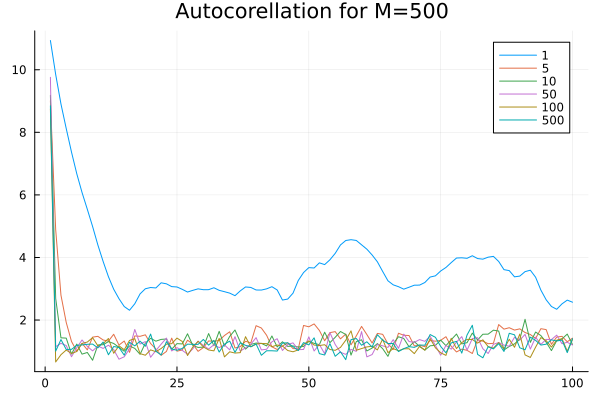

In [36]:
plot(collect(1:100), [norms[1,1,1:100] norms[1,2,1:100] norms[1,3,1:100] norms[1,4,1:100] norms[1,5,1:100] norms[1,6,1:100]], title="Autocorellation for M=500", label=["1" "5" "10" "50" "100" "500"], linewidth=1)


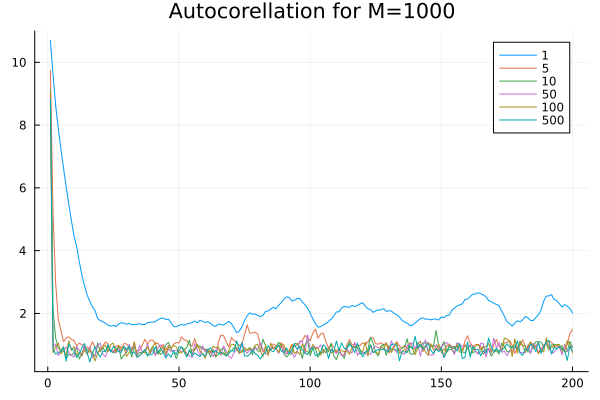

In [37]:
plot(collect(1:200), [norms[2,1,1:200] norms[2,2,1:200] norms[2,3,1:200] norms[2,4,1:200] norms[2,5,1:200] norms[2,6,1:200]], title="Autocorellation for M=1000", label=["1" "5" "10" "50" "100" "500"], linewidth=1)

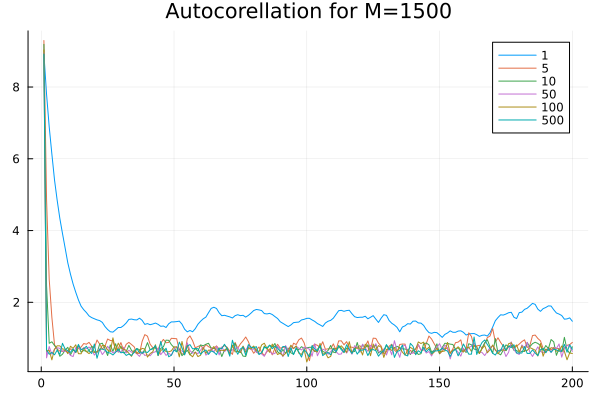

In [38]:
plot(collect(1:200), [norms[3,1,1:200] norms[3,2,1:200] norms[3,3,1:200] norms[3,4,1:200] norms[3,5,1:200] norms[3,6,1:200]], title="Autocorellation for M=1500", label=["1" "5" "10" "50" "100" "500"], linewidth=1)

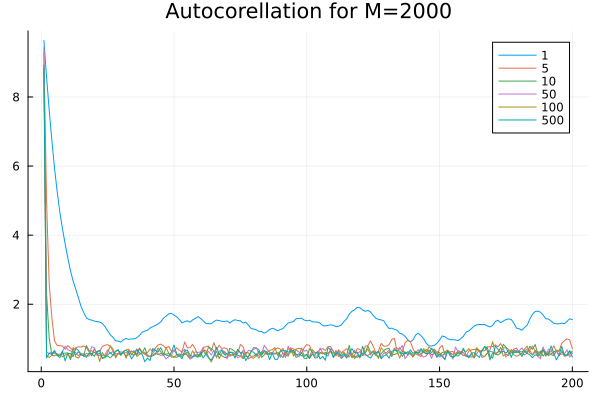

In [39]:
plot(collect(1:200), [norms[4,1,1:200] norms[4,2,1:200] norms[4,3,1:200] norms[4,4,1:200] norms[4,5,1:200] norms[4,6,1:200]], title="Autocorellation for M=2000", label=["1" "5" "10" "50" "100" "500"], linewidth=1)

Looking at the plots we can make some interesting observations.
    
First of all we underline the fact that, as expected, the norms of the autocorrelation function estimates seem to quickly converge to a value that is much close to zero (obviously, since we are using the 1-norm we do expect a value that is a bit greater - as it is the sum of the absolute values of 25 correlations).

We can then tackle the different results obtained letting $M$ and $T_{wait}$ vary.

For what concerns the sample size $M$, we observe that increasing the sample size seems to reduce the oscillations of the estimtes. More formally, we can say that as the sample size gets larger, the variance of the norms of the autocorrelation estimates decreases. We expected this result, indeed the variance of the sample covariance matrix (the estimator of the covariance matrix we have used in the compuation of the autocorrelation function estimate) is a decreasing function of the sample size (specifically $\hat{S}^2 \propto \frac{1}{M}$ ).

Nevertheless, the difference is not so relevant to justify the use of a sample size greater that $500$ in the previous Boltzmann machine learning schemes.

Now, for each fixed sample size $M$ we can analyze how varying the parameter $T_{wait}$ of the Metropolis-Hasting algorithm affects the autocorrelations. To do so we recall that $T_{wait}$ is the parameter of the Metropolis algorithm used to take care of the fact that samples obtained by Markov Chain Monte Carlo methods are clearly not independent. Indeed it produces a burn-in in order to save samples that are "sufficiently distant in time" to be considered approximately independent from one another.

Obviously, increasing $T_{wait}$ will lead to samples that approximate better and better an i.i.d. model. On the other hand, however, creating a burn-in is computationally demanding and using a too large $T_{wait}$ may "waste" important resources. Finding a reasonably balance between these two scenarios is important in real-life applications.

Here we will also use the examination of the autocorrelation estimates as an evidence to support our previous choice of $T_{wait} = 100$.

Coming back at the plots, we start by observing that already for $T_{wait} = 10$ (hence we "skip" just ten observation between two subsequent saves), the estimates seem to decrease and stabilize very quickly to a value that is close to zero. As $T_{wait}$ increases, all the plots are consistent with this behavior. This may suggest us that the samples collected using values of $T_{wait}$ of the order of tens or hundreds can actually be considered as a good approximation of i.i.d. samples. In other words, we can consider our sample size to be not so dissimilar from the effective sample size and this is a measure of the fact that we are exploiting our resources quite well.

Conversely, for small values of $T_{wait}$ (in particular 1 and 5), the estimates present a behavior that is slighlty more oscillating and that tends to decrease a bit slower as the autocorrelation parameter $r$ increased. The obtained values are perfectly reasonable: if we collect samples from our Markov chain that are separated by a small time interval, it is highly probable that they will be correlated among each others. Therefore, for small values of $r$ the autocorrelation estimates will be quite different from zero. As $r$ grows, we consider samples that are more and more distant from one another and hence, as expected, their autocorrelations decrease.

To conclude, as anticipated, we can say that our choice of $T_{wait} = 100$ seems perfectly reasonable and sufficiently large to produce a samples that is a good approximation of an i.i.d. one.
